# Test Signal Library

Examples to exercise the functions in test_signals.py

In [2]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
%pylab inline
import test_signals as tst

Populating the interactive namespace from numpy and matplotlib


## make_random_signal

In [3]:
help(tst.make_random_signal)

Help on function make_random_signal in module test_signals:

make_random_signal(nsamp)
    Make a single trace with random reflectivity
    
    A random reflectivity trace is convolved with a zero phase ricker wavelet
    Args:
        nsamp: the number of samples in the output trace
        
    Returns:
        A 1D array with the signal



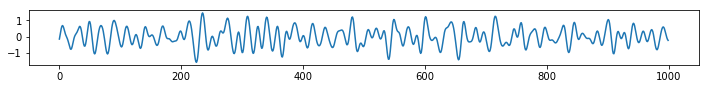

In [4]:
res = tst.make_random_signal(1000)
fig = plt.figure(figsize=(12,1))
plt.plot(res)

## make_delayed_signal_pair

In [5]:
help(tst.make_delayed_signal_pair)

Help on function make_delayed_signal_pair in module test_signals:

make_delayed_signal_pair(nsamp, delay)
    Make a pair of identical traces with specified delay
    
    A random reflectivity trace is convolved with a zero phase ricker wavelet
    and the created trace and a delayed version are returned
    Args:
        nsamp: the number of samples in the output trace
        delay: the number of samples to delay the second trace
        
    Returns:
        Two 1D arrays with the undelayed and delayed signal



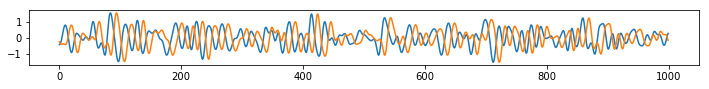

In [6]:
res, shifted = tst.make_delayed_signal_pair(1000,10)
fig = plt.figure(figsize=(12,1))
plt.plot(res)
plt.plot(shifted)

## Spherical Signal

In [7]:
help(tst.SphericalSignal)

Help on class SphericalSignal in module test_signals:

class SphericalSignal(builtins.object)
 |  Make a 3D spherical test signal
 |  
 |  Provides a 3D sinusoidal, hemisperical test signal and its spatial derivatives
 |  
 |  Args:
 |      factor: a parameter controlling the frequency content of the signal.
 |              Default is 5000.
 |      xsize: the size of the 3D signal in the 1st dimension. Default is 301.
 |      ysize: the size of the 3D signal in the 2nd dimension. Default is 301.
 |      zsize: the size of the 3D signal in the last dimension. Default is 301.
 |      deriv: what derivative of the test signal to create. Default is None.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, factor=5000, xsize=301, ysize=301, zsize=301, deriv=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  getXslice(self, x, xstep, ystep)
 |      A generator for a series of data cubes along a y-z plane at location x
 |      
 |      Allows iteration al

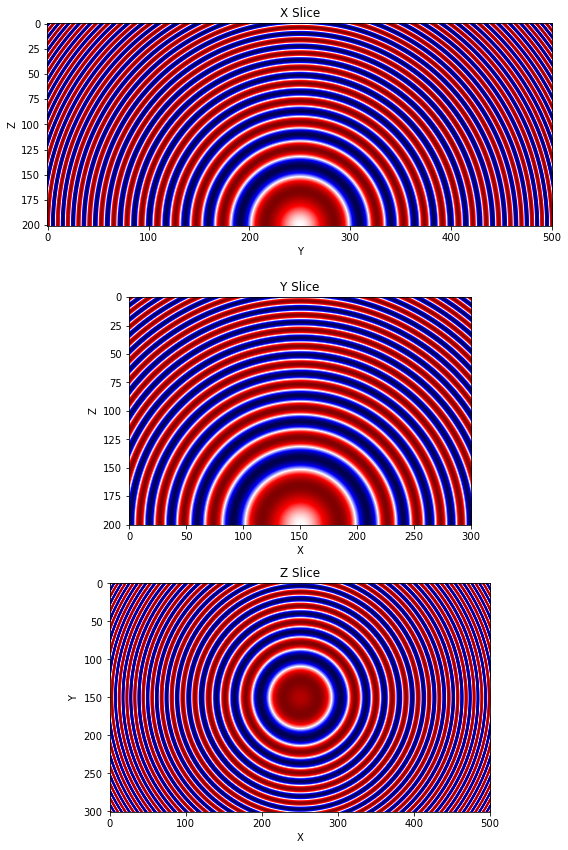

In [19]:
factor = 3000
Nx = 301
Ny = 501
Nz = 201
data = tst.SphericalSignal(factor,Nx,Ny,Nz)

f,ax = plt.subplots(3,1,figsize=(8,12))
ax[0].set_xlabel('Y')
ax[0].set_ylabel('Z')
ax[0].set_title('X Slice')
ax[0].imshow(data.xSlice(Nx//2),cmap='seismic',interpolation='bilinear')

ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')
ax[1].set_title('Y Slice')
ax[1].imshow(data.ySlice(Ny//2),cmap='seismic',interpolation='bilinear')

ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
ax[2].set_title('Z Slice')
ax[2].imshow(data.zSlice(Nz//2),cmap='seismic',interpolation='bilinear')
f.tight_layout()

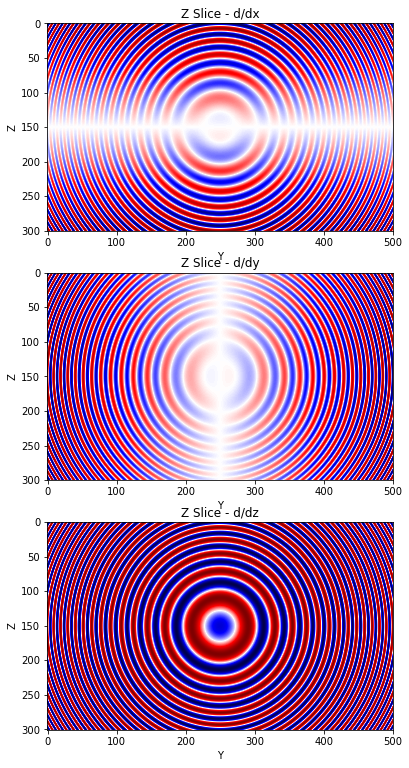

In [20]:
f,ax = plt.subplots(3,1,figsize=(8,13))
ax[0].set_xlabel('Y')
ax[0].set_ylabel('Z')
ax[0].set_title('Z Slice - d/dx')
data = tst.SphericalSignal(factor,Nx,Ny,Nz, deriv='dx')
ax[0].imshow(data.zSlice(Nz//2),cmap='seismic',interpolation='bilinear')

ax[1].set_xlabel('Y')
ax[1].set_ylabel('Z')
ax[1].set_title('Z Slice - d/dy')
data = tst.SphericalSignal(factor,Nx,Ny,Nz, deriv='dy')
ax[1].imshow(data.zSlice(Nz//2),cmap='seismic',interpolation='bilinear')

ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')
ax[2].set_title('Z Slice - d/dz')
data = tst.SphericalSignal(factor,Nx,Ny,Nz, deriv='dz')
ax[2].imshow(data.zSlice(Nz//2),cmap='seismic',interpolation='bilinear')


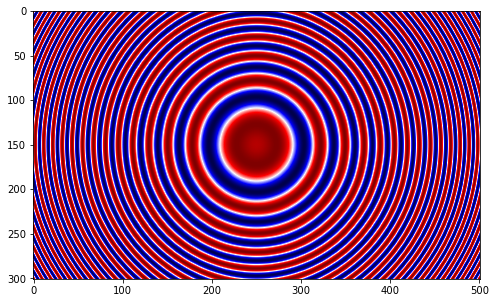

In [21]:
data = tst.SphericalSignal(factor,Nx,Ny,Nz)
tmp = np.zeros(Ny*Nx)
i=0
for indata in data.getZslice(Nz//2,1,1,1):
    tmp[i] = indata[1,1,1]
    i+=1

f,ax = plt.subplots(figsize=(8,8))
imgplot = ax.imshow(tmp.reshape((Nx,Ny)),cmap='seismic',interpolation='bilinear')